In [328]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from datetime import timedelta, datetime
from scipy.optimize import curve_fit
import plotly.graph_objects as go
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint
from random import randrange # Obtener un numero randomico
import simpy
import random


In [329]:
url = 'C:\\Users\\Braulio Castro\\Desktop\\10 Ciclo\\Simulacion\\RecuperadosEcuador.csv'
df = pd.read_csv(url)
df = df[df['Country/Region'].isin(['Ecuador'])]
df = df.loc[:,['Date','Recovered']]
FMT = '%Y-%m-%d'
date = df['Date']
df['Date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df
y_real = list(df.iloc [:, 1]) # Total recuperados
x_real = list(df.iloc [:, 0]) # Dias

In [330]:
filtro = df.iloc [:, 1] # Filtro los datos que se empezo a tener recuperados
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)


1234.5
1563.25


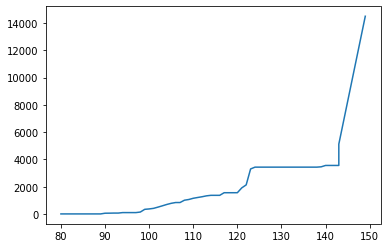

In [331]:
#Quiero predecir cuántos "recuperados" voy a obtener de aqui a 7 dias.
y = list(df.iloc [:, 1]) # Total casos
x = list(df.iloc [:, 0]) # Dias
for i in range(x[-1], x[-1]+7):
    x.append(i)
    y.append(int(y[-1] + media))
plt.plot(x, y)
plt.show()

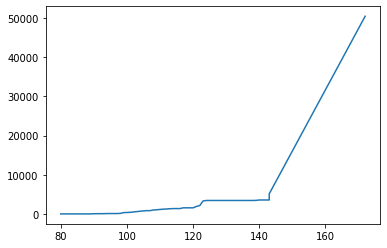

In [336]:
#predecir cuántos "recuperados" voy a obtener de aqui a 1 mes.
y = list(df.iloc [:, 1]) # Total casos
x = list(df.iloc [:, 0]) # Dias
for i in range(x[-1], x[-1]+30):
    x.append(i)
    y.append(int(y[-1] + media))
plt.plot(x, y)
plt.show()

In [333]:
def func(x, c0, c1, c2, c3):
    return c0 * np.exp(-c1 * x) + c2 + c3

In [334]:
g = [100, 0.01, 200, 0.01]
n = len(x[60:])
y = np.empty(n)
for i in range(n):
    y[i] = func(x[i], g[0], g[1], g[2], g[3])
    

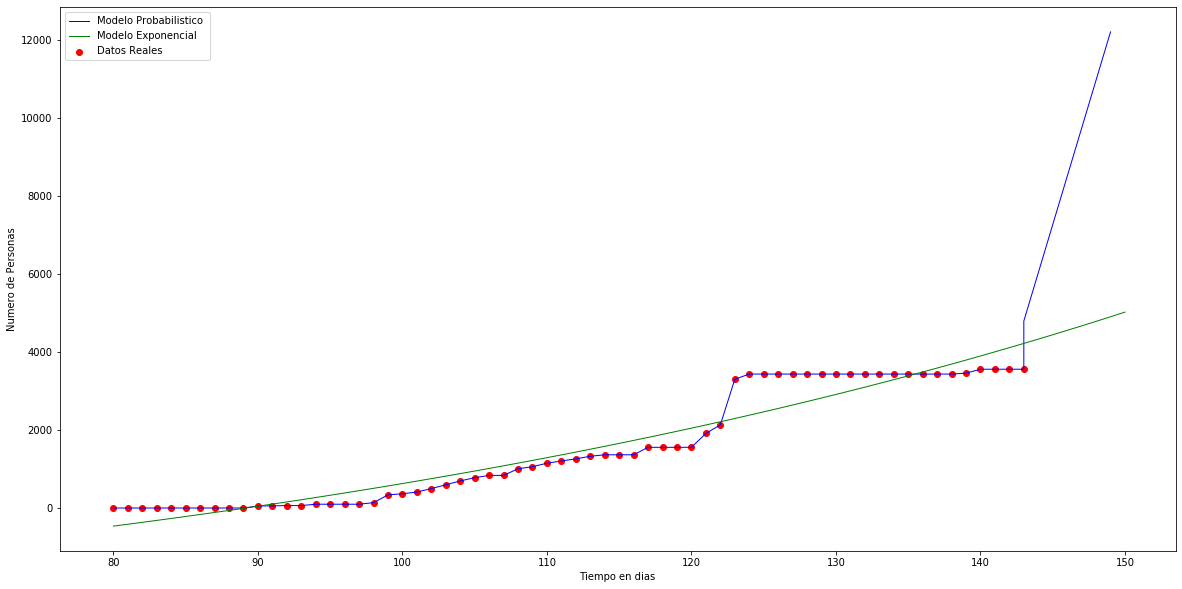

In [335]:
#Modelo Probabilidad
y1 = list(df.iloc [:, 1]) # Total casos
x1 = list(df.iloc [:, 0]) # Dias
#Prediccion 7 dias
for i in range(x1[-1], x1[-1]+7):
    x1.append(i)
    y1.append(int(y1[-1] + mediana))

#Modelo exponencial
yy = list(df.iloc [:, 1]) # Total casos
xx = list(df.iloc [:, 0]) # Dias
casos = list(df.iloc [:, 1])# Total casos
dias = list(df.iloc [:, 0]) # Dias

popt, pcov = curve_fit(func, dias, casos, g)
for i in range(n):
    casos[i] = func(dias[i], popt[0], popt[1], popt[2], popt[3])


#Predecir para 7 dias
pred_x = np.array(list(range(min(dias),max(dias)+8)))#  Grafica 1

#  Grafica 2
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(x1, y1, 'b', alpha=1, lw=1, label='Modelo Probabilistico ')
ax.plot(pred_x, func(pred_x,*popt), 'g', alpha=1, lw=1, label='Modelo Exponencial')
ax.scatter(xx, yy,label="Datos Reales",color="red")
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')

legend = ax.legend()

In [339]:
print("Modelo Probabilistico ")
print("Prediccion en 7 dias =: ",*y1[-1:])

print("")
print("Modelo Exponencial ")
print("Prediccion en 7 dias =: ",int(func(pred_x,*popt)[-1:]))
totalPersonas=int(func(pred_x,*popt)[-1:])

print("")
print("Datos Reales")
print("En 7 dias=: ",*y_real[-1:])



Modelo Probabilistico 
Prediccion en 7 dias =:  40577

Modelo Exponencial 
Prediccion en 7 dias =:  8242

Datos Reales
En 7 dias=:  3557


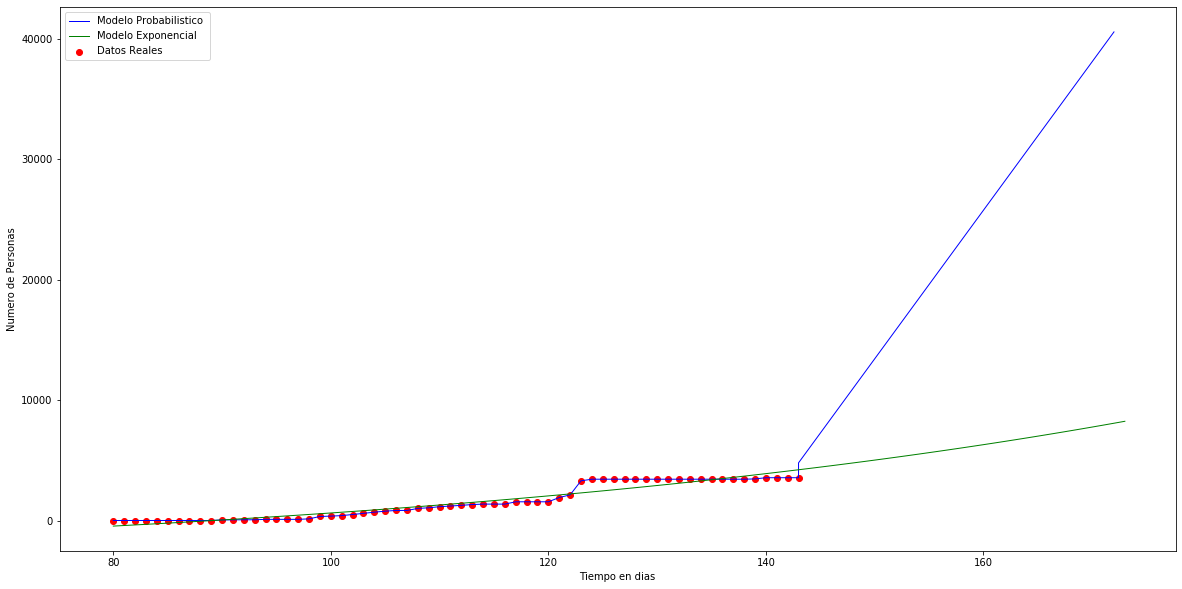

In [337]:
#Modelo Probabilidad
y1 = list(df.iloc [:, 1]) # Total casos
x1 = list(df.iloc [:, 0]) # Dias
#Prediccion 1 mes
for i in range(x1[-1], x1[-1]+30):
    x1.append(i)
    y1.append(int(y1[-1] + mediana))

#Modelo exponencial
yy = list(df.iloc [:, 1]) # Total casos
xx = list(df.iloc [:, 0]) # Dias
casos = list(df.iloc [:, 1])# Total casos
dias = list(df.iloc [:, 0]) # Dias

popt, pcov = curve_fit(func, dias, casos, g)
for i in range(n):
    casos[i] = func(dias[i], popt[0], popt[1], popt[2], popt[3])


#Predecir para 1 mes
pred_x = np.array(list(range(min(dias),max(dias)+31)))
#  Grafica 1
fig = go.Figure()

fig.add_trace(go.Scatter(y=yy,x=xx,mode='markers',name='Datos Reales'))
fig.add_trace(go.Scatter(y=func(pred_x,*popt),x=pred_x,mode='lines',name='Modelo Exponencial'))
fig.add_trace(go.Scatter(y=y1,x=x1,mode='lines',name='Modelo Probabilistico'))

fig.show()

#  Grafica 2
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(x1, y1, 'b', alpha=1, lw=1, label='Modelo Probabilistico ')
ax.plot(pred_x, func(pred_x,*popt), 'g', alpha=1, lw=1, label='Modelo Exponencial')
ax.scatter(xx, yy,label="Datos Reales",color="red")
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')

legend = ax.legend()

In [89]:
print("Modelo Probabilistico ")
print("Prediccion en 1 mes =: ",*y1[-1:])

print("")
print("Modelo Exponencial ")
print("Prediccion en 1 mes =: ",int(func(pred_x,*popt)[-1:]))
totalPersonas=int(func(pred_x,*popt)[-1:])

print("")
print("Datos Reales")
print("En 1 mes =: ",*y_real[-1:])

print(totalPersonas)


Modelo Probabilistico 
Prediccion en 1 mes =:  40577

Modelo Exponencial 
Prediccion en 1 mes =:  8242

Datos Reales
En 1 mes =:  3557
8242


In [340]:
class Persona:
    nombre = ''
    empleo=''
    estado=''
    prueba=0

    def __init__(self, nombre, empleo,estado,prueba):
        self.nombre = nombre
        self.empleo=empleo
        self.estado=estado
        self.estado=prueba

In [341]:
def empleo():
    #SELECCION DE EMPLEOS
    pr = random.randint(1, 5)
    if pr == 1:
        return 'Alimentacion'
    if pr == 2:
        return 'Retail'
    if pr == 3:
        return 'Restaurante'
    if pr == 5:
        return 'Viajes'
    if pr == 4:
        return 'Hoteles'

In [342]:
personas=[]
#generar personas
for i in range(0, totalPersonas):
    persona = Persona('Persona-%d'%i,empleo(), '', 0)
    personas.append(persona)
    persona = None
    

In [343]:
#personas recuperadas con empleo 
NumeroPersonas=len(personas)
#tiempo simulacion 
TIEMPO=365
#Intervalo de llegada
INTERVALO=media

tiempoTeletrabajo={}
tiempoPresencial={}
sinEmpleo=[]
conEmpleo=[]
tele=[]
pre=[]

class Empresa:
    
    def __init__(self,environment,recursos):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        self.recursos = simpy.Resource(environment, recursos)
    def meses(self, dia):
        #CONVERSION DE DIAS A MESES
        if dia > 120 and dia <= 150:
            return 'Mayo'
        if dia > 150 and dia <= 180:
            return 'Junio'
        if dia > 180 and dia <= 210:
            return 'Julio'
        if dia > 210 and dia <= 240:
            return 'Agosto'
        if dia > 240 and dia <= 270:
            return 'Septiembre'
        if dia > 270 and dia <= 300:
            return 'Octubre'
        if dia > 300 and dia <= 330:
            return 'Noviembre'
        if dia > 330:
            return 'Diciembre'
        
        if dia >= 0 and dia <= 30:
            return 'enero' 
        if dia > 30 and dia <= 60:
            return 'febrero'
        if dia > 60 and dia <= 90:
            return 'marzo'
        if dia > 90 and dia <= 120:
            return 'abril'
        
            
        
    def aviso(self, persona):
        pr = random.randint(1, 100)
        if pr <=70:
            persona.estado ="Sin Trabajo"
            print('Aviso', persona.nombre, persona.estado)
            sinEmpleo.append(persona)
        else:
            persona.estado ="Con Trabajo"
            print('Aviso ', persona.nombre,persona.estado)
            conEmpleo.append(persona)
        yield self.env.timeout(1)    
        
    def descanso_hogar(self, persona):
        #Persona recuperada debe descansar de 2 a 7 dias 
        tiempo = random.randint(2, 7)
        yield self.env.timeout(tiempo)
        print('La ', persona.nombre, ' descanso: ', tiempo, ' dias')
        
    def teletrabajo(self, persona):
        tiempo = random.randint(5, 14)
        print('La ', persona.nombre, 'Empieza con el Teletrabajo al dia: ',tiempo)
        tele.append(persona)
        mes = self.meses(self.env.now)
        tiempoTeletrabajo[persona.nombre,persona.empleo]=mes
        
        self.prueba(persona)
        if  persona.prueba == 1:
            tiempo = random.randint(3, 7)
            yield self.env.timeout(tiempo)
            print('La ', persona.nombre, 'Regresa el teletrabajo al dia: ',tiempo)
            tele.append(persona)
            mes = self.meses(self.env.now)
            tiempoTeletrabajo[persona.nombre,persona.empleo]=mes
            self.prueba(persona)
        
    def prueba(self, persona):
        #Prueba valoracion 1 no aprovado valoracion 2 aprobado 
        #70% de integracion, 30 regresar teletrabajo 
        pr = random.randint(0,100)
        if pr <=70:
            persona.test = 2
            
            print('La', persona.nombre, ' Continua en el puesto de:', persona.empleo)
            mes = self.meses(self.env.now)
            tiempoPresencial[persona.nombre,persona.empleo]=mes
            pre.append(persona)
        else:
            print('La', persona.nombre, ' No pasa Valoracion tiene que regresear al teletrabajo por 3-7 dias  CARGO=:', persona.empleo)
            persona.prueba=1
            mes = self.meses(self.env.now)
            tiempoTeletrabajo[persona.nombre,persona.empleo]=mes
            tele.append(persona)
            
            
    
            
    
    
    

In [344]:
def simular(env, persona, empresa):
        with empresa.recursos.request() as recurso:
            yield recurso
            yield env.process(empresa.aviso(persona))
        
        if persona.estado=="Con Trabajo":
            yield env.process(empresa.descanso_hogar(persona))
            yield env.process(empresa.teletrabajo(persona))

In [345]:

def ejecutar_simulacion(env, estacion):
    empresa = Empresa(env, estacion)
    for persona in personas:
        yield env.timeout(1)
        env.process(simular(env, persona, empresa))
env = simpy.Environment()
env.process(ejecutar_simulacion(env, INTERVALO))
env.run(until = TIEMPO)

Aviso Persona-0 Sin Trabajo
Aviso Persona-1 Sin Trabajo
Aviso Persona-2 Sin Trabajo
Aviso  Persona-3 Con Trabajo
Aviso Persona-4 Sin Trabajo
Aviso Persona-5 Sin Trabajo
Aviso Persona-6 Sin Trabajo
Aviso Persona-7 Sin Trabajo
Aviso Persona-8 Sin Trabajo
La  Persona-3  descanso:  5  dias
La  Persona-3 Empieza con el Teletrabajo al dia:  13
La Persona-3  Continua en el puesto de: Alimentacion
Aviso  Persona-9 Con Trabajo
Aviso Persona-10 Sin Trabajo
Aviso Persona-11 Sin Trabajo
Aviso Persona-12 Sin Trabajo
Aviso Persona-13 Sin Trabajo
Aviso  Persona-14 Con Trabajo
Aviso Persona-15 Sin Trabajo
La  Persona-9  descanso:  6  dias
La  Persona-9 Empieza con el Teletrabajo al dia:  14
La Persona-9  No pasa Valoracion tiene que regresear al teletrabajo por 3-7 dias  CARGO=: Alimentacion
Aviso  Persona-16 Con Trabajo
Aviso Persona-17 Sin Trabajo
Aviso  Persona-18 Con Trabajo
La  Persona-14  descanso:  4  dias
La  Persona-14 Empieza con el Teletrabajo al dia:  11
La Persona-14  Continua en el puest

Aviso Persona-101 Sin Trabajo
La  Persona-99  descanso:  2  dias
La  Persona-99 Empieza con el Teletrabajo al dia:  13
La Persona-99  Continua en el puesto de: Alimentacion
Aviso  Persona-102 Con Trabajo
La  Persona-92 Regresa el teletrabajo al dia:  6
La Persona-92  Continua en el puesto de: Restaurante
Aviso Persona-103 Sin Trabajo
Aviso Persona-104 Sin Trabajo
Aviso  Persona-105 Con Trabajo
Aviso Persona-106 Sin Trabajo
Aviso Persona-107 Sin Trabajo
Aviso  Persona-108 Con Trabajo
Aviso  Persona-109 Con Trabajo
La  Persona-102  descanso:  7  dias
La  Persona-105  descanso:  4  dias
La  Persona-102 Empieza con el Teletrabajo al dia:  7
La Persona-102  No pasa Valoracion tiene que regresear al teletrabajo por 3-7 dias  CARGO=: Retail
La  Persona-105 Empieza con el Teletrabajo al dia:  14
La Persona-105  Continua en el puesto de: Viajes
Aviso  Persona-110 Con Trabajo
Aviso  Persona-111 Con Trabajo
Aviso Persona-112 Sin Trabajo
La  Persona-108  descanso:  4  dias
La  Persona-108 Empieza 

La  Persona-183  descanso:  2  dias
La  Persona-183 Empieza con el Teletrabajo al dia:  14
La Persona-183  No pasa Valoracion tiene que regresear al teletrabajo por 3-7 dias  CARGO=: Restaurante
Aviso  Persona-186 Con Trabajo
Aviso  Persona-187 Con Trabajo
Aviso  Persona-188 Con Trabajo
Aviso  Persona-189 Con Trabajo
La  Persona-182  descanso:  7  dias
La  Persona-183 Regresa el teletrabajo al dia:  4
La Persona-183  No pasa Valoracion tiene que regresear al teletrabajo por 3-7 dias  CARGO=: Restaurante
La  Persona-186  descanso:  3  dias
La  Persona-182 Empieza con el Teletrabajo al dia:  11
La Persona-182  Continua en el puesto de: Retail
La  Persona-186 Empieza con el Teletrabajo al dia:  6
La Persona-186  Continua en el puesto de: Retail
Aviso  Persona-190 Con Trabajo
Aviso Persona-191 Sin Trabajo
La  Persona-188  descanso:  3  dias
La  Persona-188 Empieza con el Teletrabajo al dia:  13
La Persona-188  Continua en el puesto de: Retail
Aviso Persona-192 Sin Trabajo
La  Persona-189  

La  Persona-267 Regresa el teletrabajo al dia:  7
La Persona-267  Continua en el puesto de: Viajes
Aviso Persona-278 Sin Trabajo
La  Persona-273  descanso:  5  dias
La  Persona-273 Empieza con el Teletrabajo al dia:  5
La Persona-273  No pasa Valoracion tiene que regresear al teletrabajo por 3-7 dias  CARGO=: Alimentacion
Aviso  Persona-279 Con Trabajo
La  Persona-272  descanso:  7  dias
La  Persona-272 Empieza con el Teletrabajo al dia:  9
La Persona-272  No pasa Valoracion tiene que regresear al teletrabajo por 3-7 dias  CARGO=: Hoteles
Aviso  Persona-280 Con Trabajo
Aviso Persona-281 Sin Trabajo
Aviso Persona-282 Sin Trabajo
Aviso  Persona-283 Con Trabajo
La  Persona-276  descanso:  7  dias
La  Persona-279  descanso:  4  dias
La  Persona-280  descanso:  3  dias
La  Persona-276 Empieza con el Teletrabajo al dia:  9
La Persona-276  Continua en el puesto de: Viajes
La  Persona-279 Empieza con el Teletrabajo al dia:  12
La Persona-279  Continua en el puesto de: Restaurante
La  Persona-2

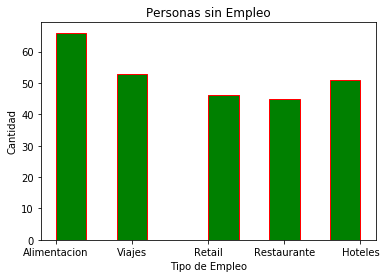

<BarContainer object of 261 artists>

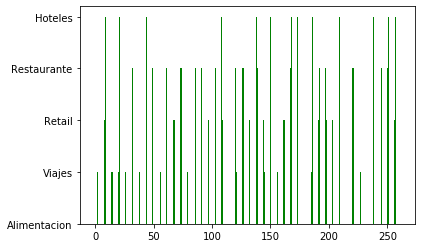

In [232]:
import matplotlib.pyplot as plt

plt.hist([persona.empleo for persona in sinEmpleo],bins=10, edgecolor='red',color = "g")

plt.title("Personas sin Empleo")
plt.xlabel("Tipo de Empleo")
plt.ylabel("Cantidad")
plt.show()

X = np.arange(len(sinEmpleo))
plt.bar(X,[persona.empleo for persona in sinEmpleo],color = "g", width = 0.25)

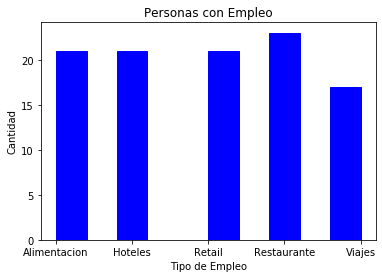

<BarContainer object of 103 artists>

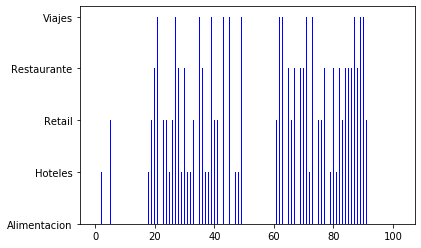

In [233]:

plt.hist([persona.empleo for persona in conEmpleo],bins=10, edgecolor='blue',color = "b")

plt.title("Personas con Empleo")
plt.xlabel("Tipo de Empleo")
plt.ylabel("Cantidad")
plt.show()

X = np.arange(len(conEmpleo))
plt.bar(X,[persona.empleo for persona in conEmpleo],color = "b", width = 0.25)

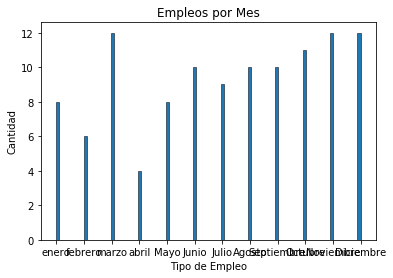

<BarContainer object of 112 artists>

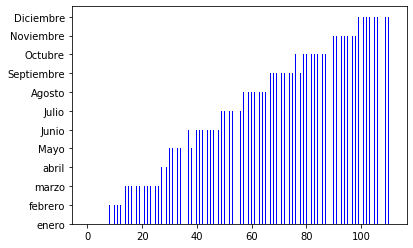

In [308]:

values= tiempoTeletrabajo.values()
mes=list(values)
plt.hist([ m for m in mes], bins=100, edgecolor = 'black',linewidth=0.5)
plt.title("Empleos por Mes")
plt.xlabel("Tipo de Empleo")
plt.ylabel("Cantidad")
plt.show()
X = np.arange(len(mes))
plt.bar(X,[persona for persona in mes],color = "b", width = 0.25)

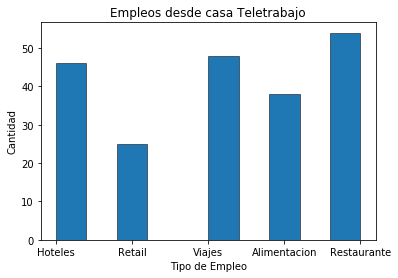

<BarContainer object of 211 artists>

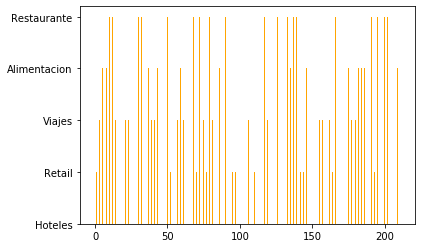

In [325]:
plt.hist([ m.empleo for m in tele], bins=10, edgecolor = 'black',linewidth=0.5)
plt.title("Empleos desde casa Teletrabajo")
plt.xlabel("Tipo de Empleo")
plt.ylabel("Cantidad")
plt.show()
X = np.arange(len(tele))
plt.bar(X,[persona.empleo for persona in tele],color = "orange", width = 0.25)

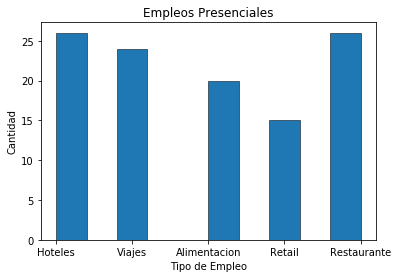

<BarContainer object of 111 artists>

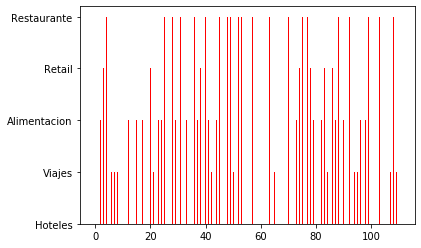

In [326]:
plt.hist([ m.empleo for m in pre], bins=10, edgecolor = 'black',linewidth=0.5)
plt.title("Empleos Presenciales")
plt.xlabel("Tipo de Empleo")
plt.ylabel("Cantidad")
plt.show()
X = np.arange(len(pre))
plt.bar(X,[persona.empleo for persona in pre],color = "red", width = 0.25)

# Analisis
Al realizar la comparación con los modelos Probabilístico y el modelo matemático exponencial, en una predicción de 1 mes y 7 dias, se obtienen los siguientes datos.

1. Para 1 Mes
    - Modelo Probabilistico 
    Prediccion en 1 mes =:  40577

    - Modelo Exponencial 
    Prediccion en 1 mes =:  8242

    - Datos Reales
    En 1 mes =:  3557
    8242

2. para 1 Semana 
    - Modelo Probabilistico 
    Prediccion en 7 dias =:  40577

    - Modelo Exponencial 
    Prediccion en 7 dias =:  8242

    - Datos Reales
En 7 dias=:  3557
Donde observamos que los dos modelos tienen una aproximación, la diferencia es que el probabilístico tiene una aproximación con tendencia baja es decir una aproximación menor al valor real, y el exponencial tiene una tendencia creciente, es decir una aproxima superior al valor real.

La Regresión exponencial
nos sirve para obtener la curva exponencial de mejor ajuste de la forma, y de esta forma realizar una mejor predicion 
3. Ventajas:
   - Mientras más cercano el valor estará de 1, más preciso será el modelo.
   - La formulación es sencilla, solo se requiere el pronóstico anterior, el dato real del periodo de pronóstico y la constante de suavización.
   - No requiere demasiados datos históricos
   - Ya que es un modelo exponencial, es más preciso
   
4. Desventajas
    - Depnderan de los valores de e(Valores de tendencia) entre mayor myor sera el error de pronóstico
    - si el valor de alfa es mayor a 0.5 no convie realizar este metodo el error sera mas grande 
    - Existe un Margen de error
   
5. Modelo Probabilístico 
1.  Ventajas 

    - El modelo de probabilidad es sencillo y de fácil comprensión.
    - Al usar este modelo se puese evita toma de datos presencial.
    - Calcula rápido de medidas y varianzas(media, mediana, tec).
    - Existen paquetes informáticos para analizar datos.

2. Desventajas  
    - Se requiere tener todos los datos historicos exactos 
    - Existe un Margen de error
    - Si trabajamos con pocos datos oh no son apegados a la realidad es posible que exista desfacesen los resultados, es necesario tener datos historicos competos 
    
6. Conclusiones
Con los datos obtenidos de los dos modelos y después de realizar las diferentes comparaciones llegamos a la conclusión de que ambos modelos tienen un gran grado de acierto en la predicción de los datos, y si se hiciera una valoración matemática en cuanto al ajuste de la curva ambos modelos tendrían resultados casi parecido con la diferencia de que ciertos valores tienden a creciente( Modelo exponencial) y decreciente(Modelo probabilístico), por otra parte en la comparacion de los modelos se puede observa en las distintas graficas en don de se platean los datos del modelo matematico y del probabilistico y los datos reales donde se puede observar la tendecia de crecimiento y decrecimiento 



*NOTA: se tomaron los datos a nivel de pais dado que la provincia de Cotopaxi no tiene un registro oh el covierno no presenta registro de recuperados a nivel de provincia, solo de forma general 
